### 0. _Import Dependency_
Melakukan _import dependency_ yang diperlukan merupakan langkah awal sebelum melakukan praktikum. Untuk memudahkan mencari _dependency_ apa saja yang telah di-_import_, operasi _import dependency_ dilakukan dalam sebuah _cell_.

#### A. _Install Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [ ]:
pip install numpy scikit-image matplotlib scipy

#### B. _Import Dependency_

In [1]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening
from skimage.morphology import black_tophat, white_tophat
from helper import *
from scipy import fftpack as fp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#### C. Unduh dan Ekstrasi Dokumen Pendukung

In [2]:
os.system('gdown https://drive.google.com/uc?id=1k8TTGl70di2v_mJYHwuAgMgezCVo-XT5')
os.system('unzip Lab\ 4\ -\ Images.zip')

256

### 1. Brief Introduction

In the frequency domain, the value and location of an image can be represented by sinusoidal relationship that depend upon the frequency of a pixel occurring within an image. It determines which pixels contain more important information and whether repeating patterns occurs. \
![Transformation.png](img/Transformation.png)

This transformation is called "2D Discrete Fourier Transfromation" or 2D-DFT. One of the implementations is called "Fast Fourier Transformation" or FFT which is considered as the current fastest DFT algorithm with complexity $O(n \log n)$. (We are not going to cover the math of DFT) \
![fourier-transform.png](img/fourier-transform.png) \
![fourier-transform-letter.png](img/fourier-transform-letter.png)


### 2. Fourier Representation 

To transform an image into a frequency domain with FFT, we can use $\text{fftpack}$ modules from scipy. Mathematically, this is DFT function to map images in spatial domain $f(x,y)$ with the size of $(M,N)$ to frequency domain $F(u,v)$:
$$F(u,v) = \sum_{x=0}^{M-1}{\sum_{y=0}^{N-1}{f(x,y)e^{-i2\pi(\frac{ux}{M}+\frac{vy}{N})}}}$$
Below is the mathematical function to map image in frequency domain to spatial domain using inverse DFT:
$$f(x,y) = \frac{1}{MN}\sum_{u=0}^{M-1}{\sum_{v=0}^{N-1}{F(u,v)e^{i2\pi(\frac{ux}{M}+\frac{vy}{N})}}}$$
Here are the steps to represent an image in its frequency domain and vice versa:

In [3]:
basePath = 'Tutorial Lab 4 - Images/'
def getPath(fileName):
    return basePath + fileName

In [4]:
def showImages(imgs, titles):
    assert len(imgs) == len(titles)
    plt.figure(figsize=(20,10))
    plt.rc('font', size=20)
    for i in range(len(imgs)):
        plt.title(titles[i])
        plt.imshow(imgs[i], cmap='gray')
        plt.axis('off')
        plt.subplot(1,len(imgs),i+1)

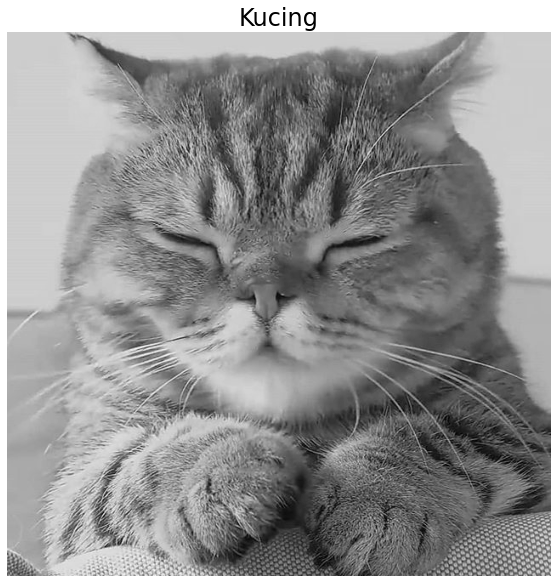

In [5]:
# Load image
im = color.rgb2gray(io.imread(getPath('lulu.jpg')))

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Kucing')
plt.imshow(im, cmap='gray')
plt.axis('off')

plt.show()

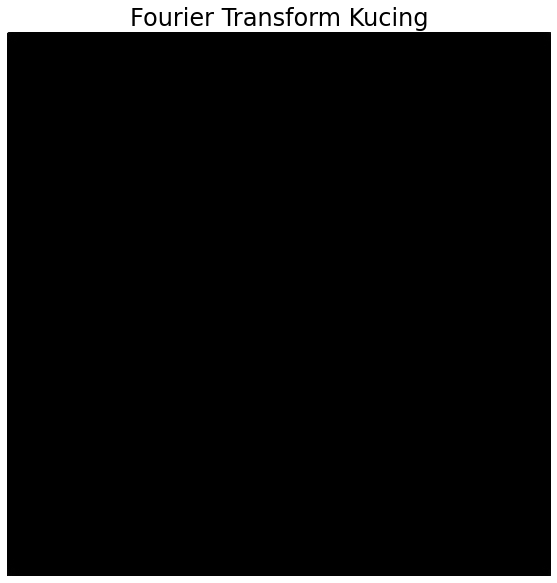

In [6]:
# Calculate DFT
# ft contains imaginary and real numbers
ft = fp.fft2(im)
# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Fourier Transform Kucing')
plt.imshow(ft_norm, cmap='gray')
plt.axis('off')

plt.show()

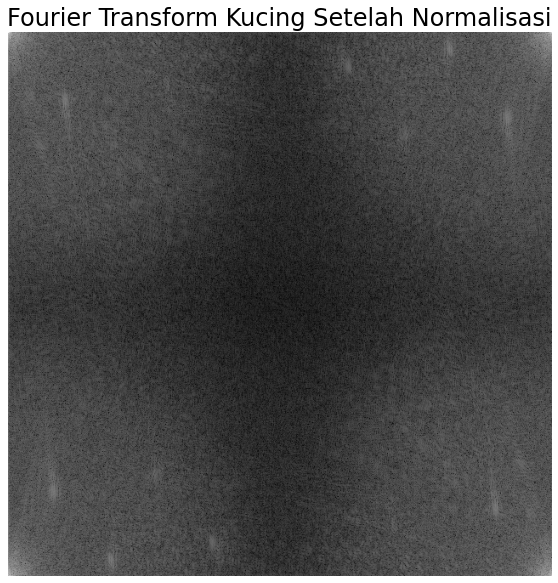

In [7]:
# Scale image
ft_scale = np.log(1 + ft_norm)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Fourier Transform Kucing Setelah Normalisasi')
plt.imshow(ft_scale, cmap='gray')
plt.axis('off')

plt.show()

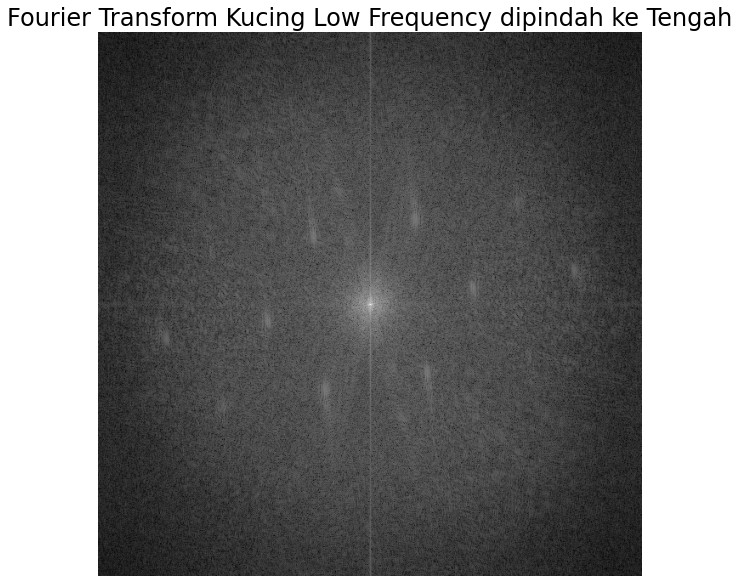

In [8]:
# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Fourier Transform Kucing Low Frequency dipindah ke Tengah')
plt.imshow(ft_shift, cmap='gray')
plt.axis('off')

plt.show()

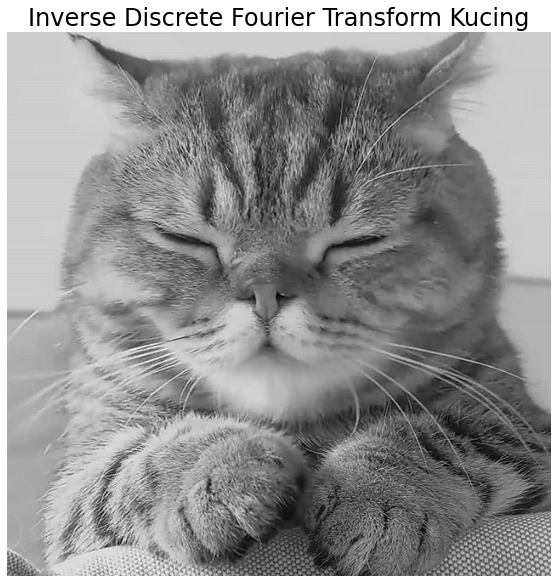

In [9]:
# Calculate IDFT
# Can process only if imaginary and real numbers
# provided (Pay attention to what var is used here)
ift = fp.ifft2(ft).real

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Inverse Discrete Fourier Transform Kucing')
plt.imshow(ift, cmap='gray')
plt.axis('off')

plt.show()

### 3. Spatial vs Frequency Filtering

In spatial domain, filtering is done by convolving images with certain filtering kernels, filtering in frequency domain can be done by multiplying image's Fourier representation with certain filtering kernels. The result of this multiplication can be transformed back into the image representation using inverse DFT. Here is an example diagram of how filtering in frequency domain works. \
![dft-filtering-process-diagram.png](img/dft-filtering-process-diagram.png)

Here are the steps differences between filtering in spatial and frequency domain using sobel filter (edge detection):

#### a. Spatial Code 

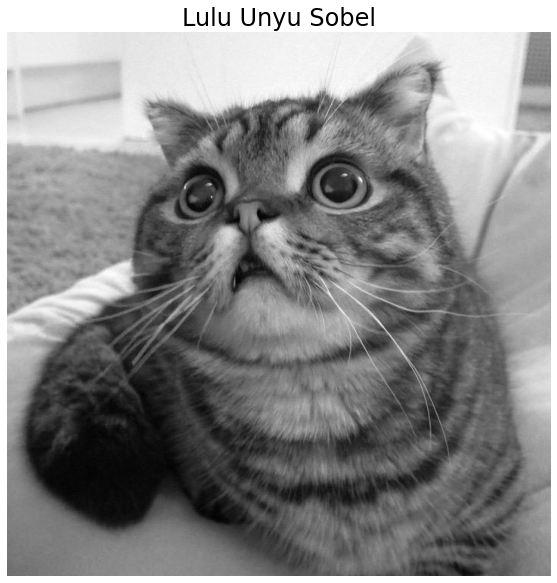

In [10]:
# Load image
lulu_sobel = io.imread(getPath('lulu_sobel.jpg'))
lulu_sobel = color.rgb2gray(lulu_sobel)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Lulu Unyu Sobel')
plt.imshow(lulu_sobel, cmap='gray')
plt.axis('off')

plt.show()

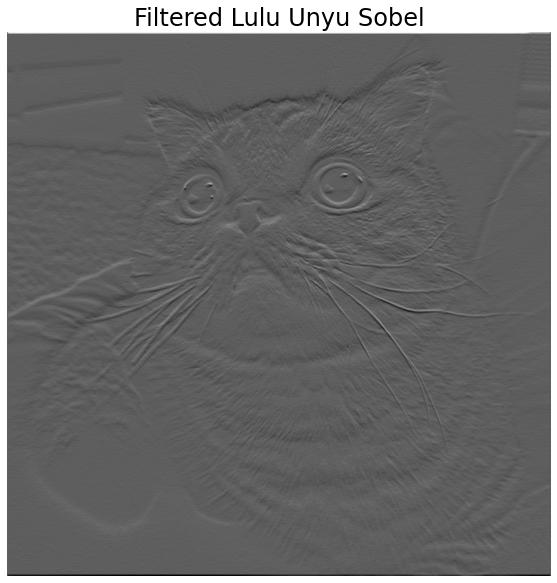

In [11]:
# Create sobel filter mask
kern = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

# Convolve the image and kernel
# Refer to scipy.signal.convolve2d
filtered_lulu_sobel = convolve2d(kern, lulu_sobel)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Filtered Lulu Unyu Sobel')
plt.imshow(filtered_lulu_sobel, cmap='gray')
plt.axis('off')

plt.show()

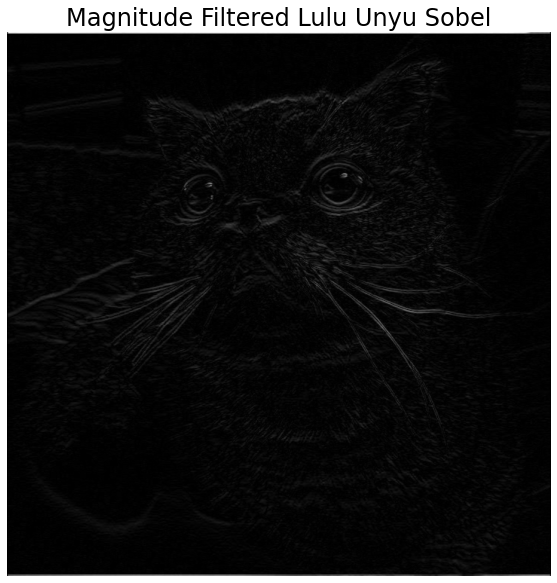

In [12]:
# Obtain magnitude for the edges
magnitude_filtered_lulu_sobel = abs(filtered_lulu_sobel)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Magnitude Filtered Lulu Unyu Sobel')
plt.imshow(magnitude_filtered_lulu_sobel, cmap='gray')
plt.axis('off')

plt.show()

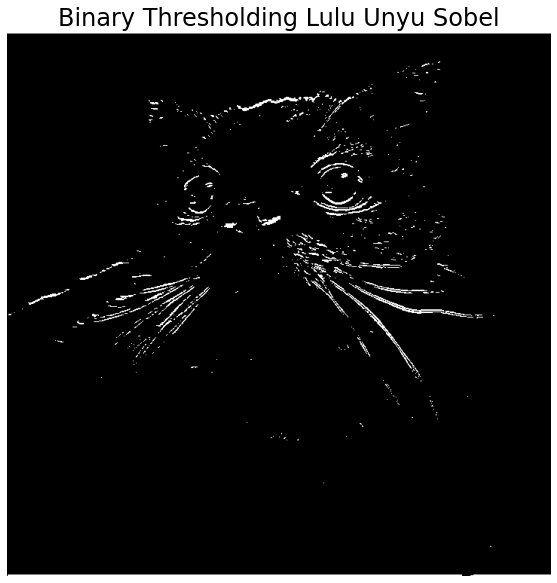

In [13]:
# Binary thresholding
binary_thresholding_lulu_sobel = magnitude_filtered_lulu_sobel > 0.5

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Binary Thresholding Lulu Unyu Sobel')
plt.imshow(binary_thresholding_lulu_sobel, cmap='gray')
plt.axis('off')

plt.show()

#### b. Frequency Code 

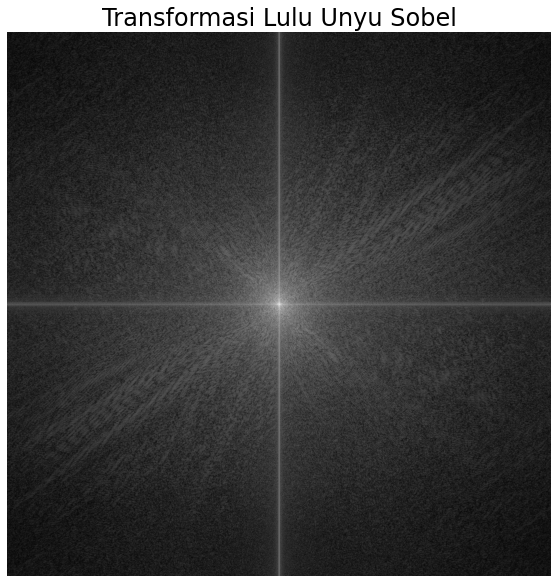

In [14]:
# Get padded image size
w, l = paddedsize(lulu_sobel.shape[0], lulu_sobel.shape[1])

# Calculate DFT
lulu_sobel_dft = fp.fft2(lulu_sobel, (w, l))
kernel_dft = fp.fft2(kern, (w, l))

# Calculate magnitude of imaginary and real numbers
lulu_sobel_norm = abs(lulu_sobel_dft)

# Scale image
lulu_sobel_scale = np.log(1 + lulu_sobel_norm)

# Shift low frequency to the center of image
lulu_sobel_shift = fp.fftshift(abs(lulu_sobel_scale))

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Transformasi Lulu Unyu Sobel')
plt.imshow(lulu_sobel_shift, cmap='gray')
plt.axis('off')

plt.show()

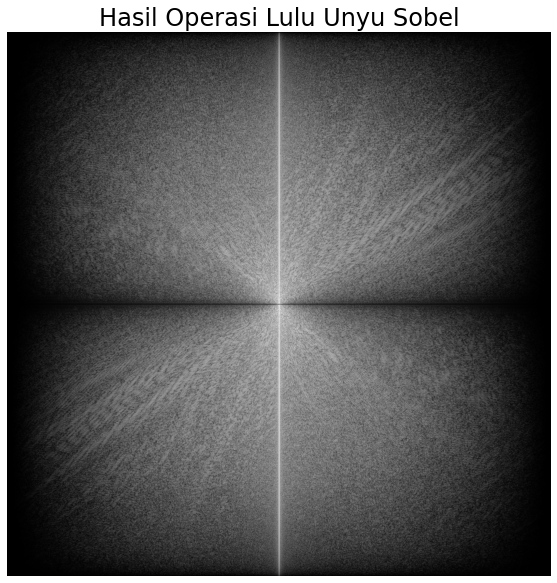

In [15]:
# Multiply the image and kernel
g = kernel_dft * lulu_sobel_dft

# Calculate magnitude of imaginary and real numbers
g_norm = abs(g)

# Scale image
g_scale = np.log(1 + g_norm)

# Shift low frequency to the center of image
g_shift = fp.fftshift(abs(g_scale))

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Hasil Operasi Lulu Unyu Sobel')
plt.imshow(g_shift, cmap='gray')
plt.axis('off')

plt.show()

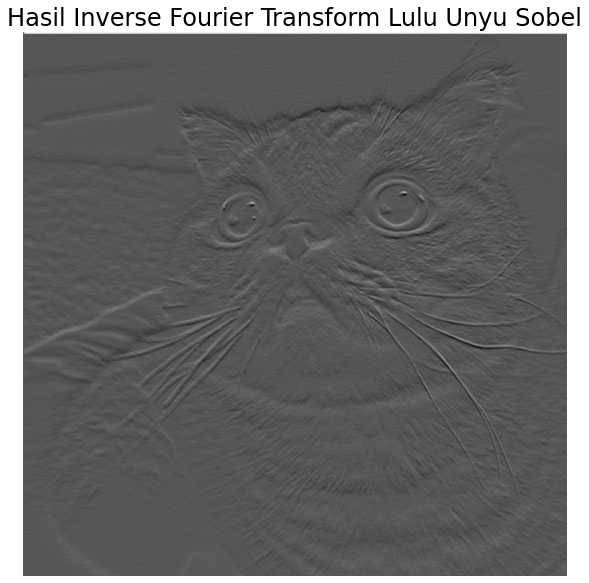

In [16]:
# Calculate Inverse DFT
g_ift = fp.ifft2(g).real

# Remove padding
g_ift = g_ift[:im.shape[0],:im.shape[1]]

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Hasil Inverse Fourier Transform Lulu Unyu Sobel')
plt.imshow(g_ift, cmap='gray')
plt.axis('off')

plt.show()

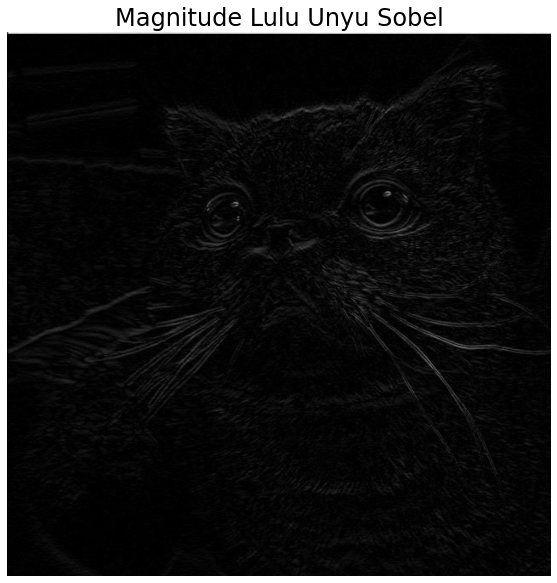

In [17]:
# Obtain magnitude for the edges
magnitude_g = abs(g_ift)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Magnitude Lulu Unyu Sobel')
plt.imshow(magnitude_g, cmap='gray')
plt.axis('off')

plt.show()

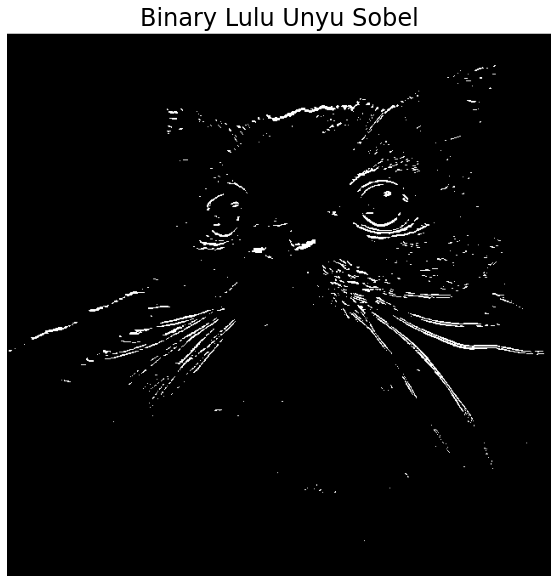

In [18]:
# Binary thresholding
binary_g = magnitude_g > 0.5

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.title('Binary Lulu Unyu Sobel')
plt.imshow(binary_g, cmap='gray')
plt.axis('off')

plt.show()

### 4. Low-Pass Filtering 

Low pass filters are used for blurring or smoothing an image. Suppress fourier transform value in high frequency and let low frequency through. There are 3 common low pass filtering techniques: Ideal Lowpass Filter, Butterworth Lowpass Filter and Gaussian Lowpass Filter \
![filters-comparison.png](img/filters-comparison.png) \
![types-of-filters.png](img/types-of-filters.png)

Below are examples to apply gaussian lowpass filter to an image

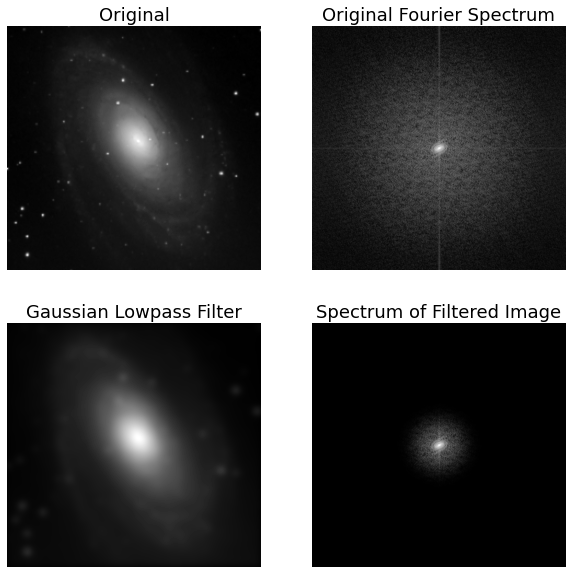

In [19]:
# Load image
galaxy = color.rgb2gray(io.imread(getPath('galaxy.png')))
w, l = paddedsize(galaxy.shape[0], galaxy.shape[1])

# Create gaussian lowpass filter
# lpfilter function is provided in helper.py
h = lpfilter('gaussian', w, l, 0.05 * w)

# Calculate DFT
galaxy_dft = fp.fft2(galaxy, (w,l))

# Apply lowpass filter
LPFS_galaxy = h * galaxy_dft

# Calculate IDFT for spatial domain transformation
LPF_galaxy = fp.ifft2(LPFS_galaxy).real
LPF_galaxy = LPF_galaxy[:galaxy.shape[0],:galaxy.shape[1]]

# Shifting for fourier spectrum display
galaxy_shift = fp.fftshift(galaxy_dft)
LPFS_galaxy_shift = fp.fftshift(LPFS_galaxy)

# Scaling for fourier spectrum display
S1 = np.log(1+abs(galaxy_shift))
S2 = np.log(1+abs(LPFS_galaxy_shift))

# Show image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.rc('font', size=15)
plt.imshow(galaxy, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(LPF_galaxy, cmap='gray')
plt.title("Gaussian Lowpass Filter")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(S2, cmap='gray')
plt.title("Spectrum of Filtered Image")
plt.axis("off")

plt.show()

#### 5. High-Pass Filtering

High pass filters are used for image sharpening. Suppress fourier transform value in low frequency and let high frequency through. There are 3 common high pass filtering techniques: Ideal Highpass Filter, Butterworth Highpass Filter and Gaussian Highpass Filter. \
![filters-comparison-high-pass.png](img/filters-comparison-high-pass.png)

Below are examples to apply gaussian highpass filter to an image

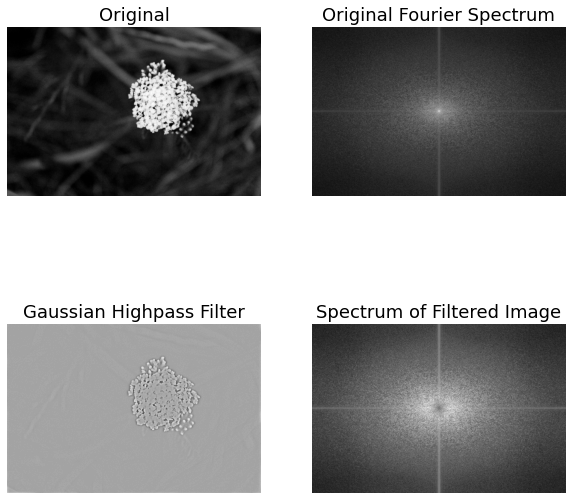

In [20]:
# Load image
flower = color.rgb2gray(io.imread(getPath('flower.jpg')))
w_flower, l_flower = paddedsize(flower.shape[0], flower.shape[1])

# Create gaussian highpass filter
# hpfilter function is provided in helper.py
h_flower = hpfilter('gaussian', w_flower, l_flower, 0.05 * w_flower)

# Calculate DFT
flower_dft = fp.fft2(flower, (w_flower, l_flower))

# Apply highpass filter
LPFS_flower = h_flower * flower_dft

# Calculate IDFT for spatial domain transformation
LPF_flower = fp.ifft2(LPFS_flower).real
LPF_flower = LPF_flower[:flower.shape[0],:flower.shape[1]]

# Shifting for fourier spectrum display
flower_shift = fp.fftshift(flower_dft)
LPF_flower_shift = fp.fftshift(LPFS_flower)

# Scaling for fourier spectrum display
S1 = np.log(1+abs(flower_shift))
S2 = np.log(1+abs(LPF_flower_shift))

# Show image
plt.figure(figsize=(10,10))
plt.rc('font', size=15)
plt.subplot(2,2,1); plt.imshow(flower, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2); plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(2,2,3); plt.imshow(LPF_flower, cmap='gray')
plt.title("Gaussian Highpass Filter")
plt.axis("off")

plt.subplot(2,2,4); plt.imshow(S2, cmap='gray')
plt.title("Spectrum of Filtered Image")
plt.axis("off")

plt.show()

### 6. Notch Filtering 

Notch filters are used to remove ”spectral” noise from an image. It is known as a band-stop filter with a narrow stopband. It will attenuate specific chosen frequency (and a few of its neighbors) and let other frequencies pass through.

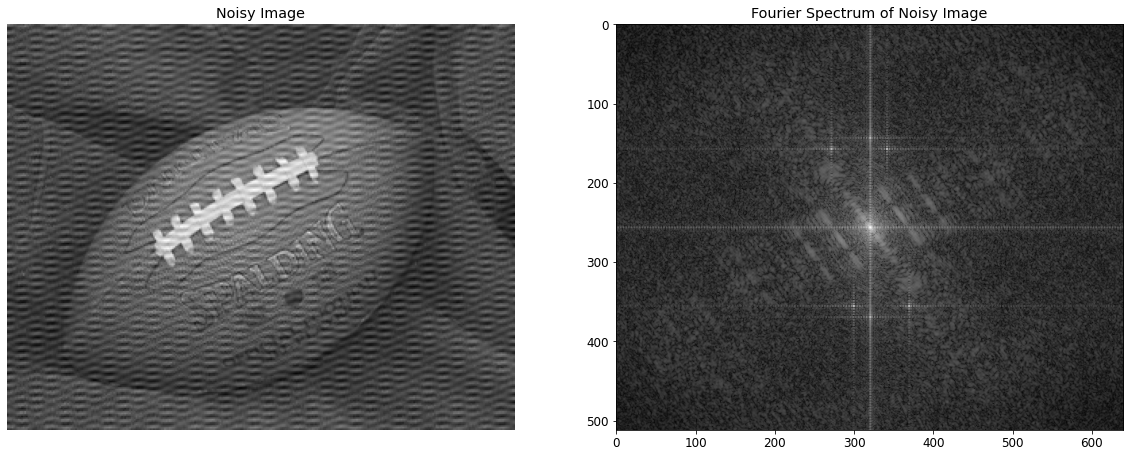

In [29]:
# Load image
football = io.imread(getPath('noiseball.png'))
w_football, l_football = paddedsize(football.shape[0],football.shape[1])

# Calculate DFT
football_dft = fp.fft2(util.img_as_float(football),(w_football, l_football))

# Scaling & Shifting for fourier spectrum display
football_dft_shift = fp.fftshift(football_dft)
S1 = np.log(1+abs(football_dft_shift))

# Show image
plt.figure(figsize=(20,20))
plt.rc('font', size=12)
plt.subplot(2,2,1); plt.imshow(football, cmap='gray')
plt.title("Noisy Image"); plt.axis("off")

plt.subplot(2,2,2); plt.imshow(S1, cmap='gray')
plt.title("Fourier Spectrum of Noisy Image");

plt.show()

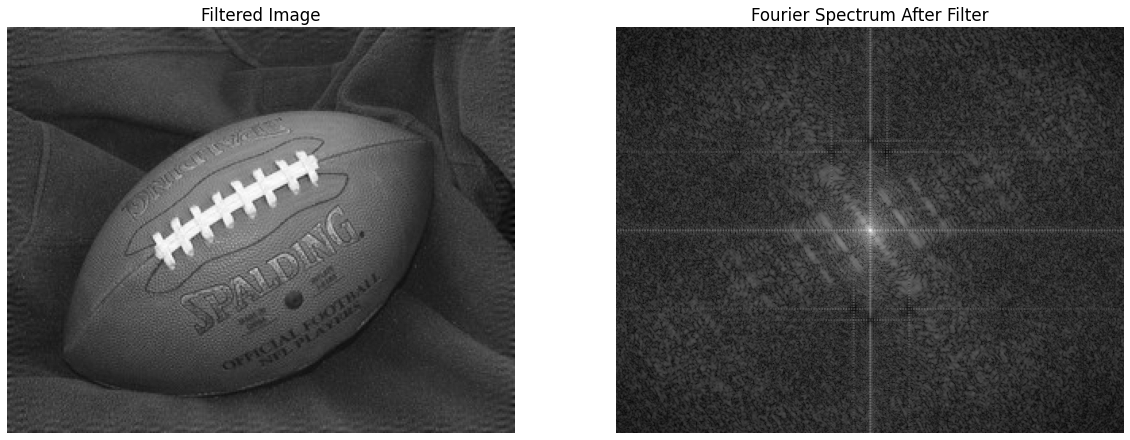

In [22]:
# Apply notch filter
# notch function is provided in helper.py
H1 = notch('btw', w_football, l_football, 10, 50, 100)
H2 = notch('btw', w_football, l_football, 10, 1, 400)
H3 = notch('btw', w_football, l_football, 10, 620, 100)
H4 = notch('btw', w_football, l_football, 10, 22, 414)
H5 = notch('btw', w_football, l_football, 10, 592, 414)
H6 = notch('btw', w_football, l_football, 10, 1, 114)

# Apply notch filter
football_notch = football_dft * H1 * H2 * H3 * H4 * H5 * H6

# Calculate IDFT for spatial domain transformation
football_idft_notch = fp.ifft2(football_notch).real
football_idft_notch = football_idft_notch[:football.shape[0],:football.shape[1]]

# Scaling & Shifting for fourier spectrum display
football_notch_shift = fp.fftshift(football_notch)
S2 = np.log(1+abs(football_notch_shift))

# Show image
plt.figure(figsize=(20,20))
plt.rc('font', size=14)
plt.subplot(1,2,1); plt.imshow(football_idft_notch, cmap='gray')
plt.title('Filtered Image')
plt.axis("off")

plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter')
plt.axis("off")
plt.show()